#  **Installing Featurewiz** 

In [1]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 36.0 MB/s 
     |████████████████████████████████| 72 kB 910 kB/s 
     |████████████████████████████████| 26.7 MB 91.9 MB/s 
     |████████████████████████████████| 96 kB 7.9 MB/s 
     |████████████████████████████████| 255.9 MB 51 kB/s 
     |████████████████████████████████| 3.2 MB 58.6 MB/s 
     |████████████████████████████████| 2.0 MB 61.5 MB/s 
     |████████████████████████████████| 1.6 MB 77.1 MB/s 
     |████████████████████████████████| 121 kB 80.0 MB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xg

#   **Importing required libraries**

In [2]:
import pandas as pd
from featurewiz import featurewiz

Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [6]:
df = pd.read_parquet('/content/drive/MyDrive/accident_data_lgbm_impute.parquet')

In [7]:
df.head()

,Accident_Index,Accident_Severity,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Year,InScotland,1st_Road_Class_missing,2nd_Road_Class_missing,2nd_Road_Number_missing,Carriageway_Hazards_missing,Junction_Control_missing,LSOA_of_Accident_Location_missing,Special_Conditions_at_Site_missing,Weather_Conditions_missing
0,200501BS00002,Slight,1.0,450.0,1.0,0.0,3.0,1,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0
1,200501BS00003,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,4.0,...,2005,1,0,1,0,1,1,0,1,0
2,200501BS00005,Slight,2.0,0.0,1.0,0.0,3.0,3,1.0,4.0,...,2005,1,1,1,0,1,1,0,1,0
3,200501BS00007,Slight,2.0,0.0,1.0,0.0,3.0,2,1.0,3.0,...,2005,1,0,1,0,1,0,0,1,0
4,200501BS00010,Slight,4.0,3212.0,3.0,304.0,3.0,4,1.0,1.0,...,2005,1,0,0,0,1,0,0,1,0


In [9]:
df.shape

(1037508, 41)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037508 entries, 0 to 1037507
Data columns (total 41 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1037508 non-null  object 
 1   Accident_Severity                            1037508 non-null  object 
 2   1st_Road_Class                               1037508 non-null  float64
 3   1st_Road_Number                              1037508 non-null  float64
 4   2nd_Road_Class                               1037508 non-null  float64
 5   2nd_Road_Number                              1037508 non-null  float64
 6   Carriageway_Hazards                          1037508 non-null  float64
 7   Day_of_Week                                  1037508 non-null  int64  
 8   Did_Police_Officer_Attend_Scene_of_Accident  1037508 non-null  float64
 9   Junction_Control                             1

In [11]:
df.nunique()

Accident_Index                                 663336
Accident_Severity                                   3
1st_Road_Class                                      5
1st_Road_Number                                  6539
2nd_Road_Class                                      5
2nd_Road_Number                                  9712
Carriageway_Hazards                                 5
Day_of_Week                                         7
Did_Police_Officer_Attend_Scene_of_Accident         3
Junction_Control                                    6
Junction_Detail                                     9
Latitude                                       733598
Light_Conditions                                    5
Local_Authority_(District)                        422
Local_Authority_(Highway)                         212
Location_Easting_OSGR                           48469
Location_Northing_OSGR                          72248
Longitude                                      768181
LSOA_of_Accident_Location   

#  **Using Featurewiz**

Calling featurewiz which will find out the important variables in our dataset automatically.

In [12]:
target = 'Accident_Severity'

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.9
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (1037508, 41)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
##################################

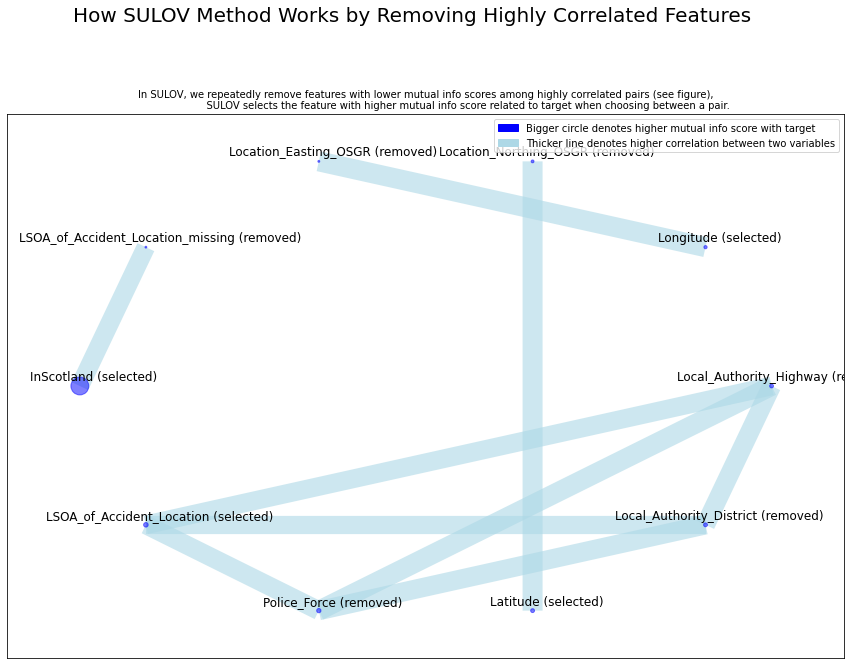

Time taken for SULOV method = 66 seconds
    Adding 0 categorical variables to reduced numeric variables  of 32
Finally 32 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 32 
    Taking top 9 features per iteration...
    XGBoost version using 1.6.2 as tree method: gpu_hist
Number of booster rounds = 20
        using 32 variables...
Regular XGBoost is crashing due to: [02:40:14] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7f490841

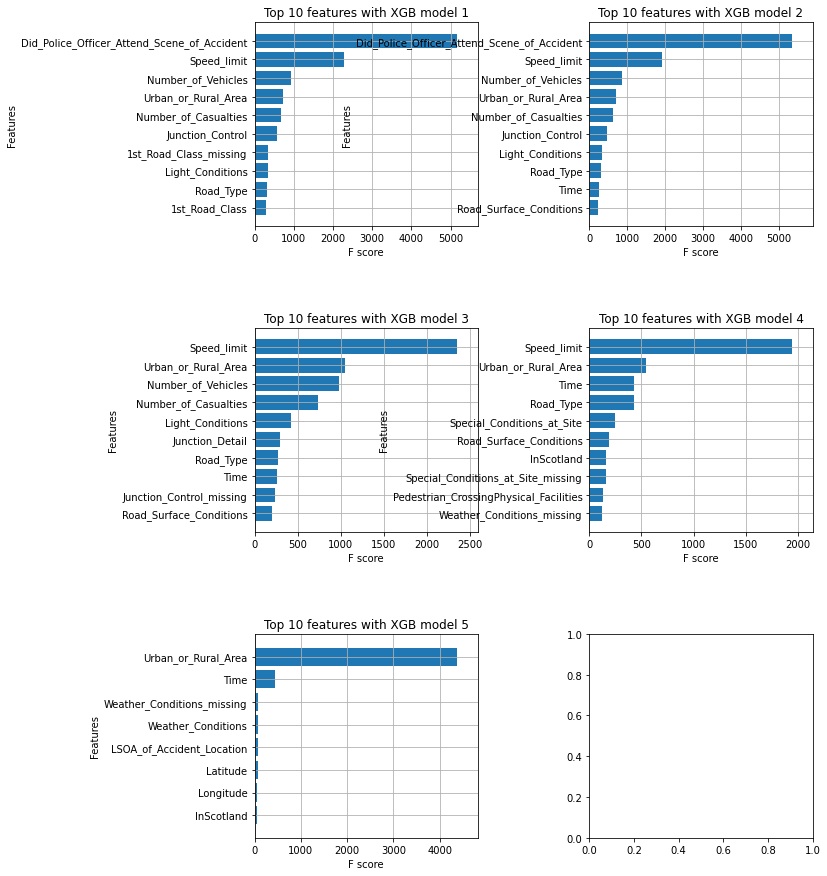

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 22 important features:
['Did_Police_Officer_Attend_Scene_of_Accident', 'Speed_limit', 'Number_of_Vehicles', 'Urban_or_Rural_Area', 'Number_of_Casualties', 'Junction_Control', '1st_Road_Class_missing', 'Light_Conditions', 'Road_Type', '1st_Road_Class', 'Time', 'Road_Surface_Conditions', 'Junction_Detail', '2nd_Road_Class_missing', 'Special_Conditions_at_Site_missing', '2nd_Road_Class', 'Carriageway_Hazards_missing', 'Junction_Control_missing', 'Special_Conditions_at_Site', 'InScotland', 'Weather_Conditions_missing', 'Weather_Conditions']
Total Time taken for featurewiz selection = 104 seconds
Output contains a list of 22 important features and a train dataframe


In [13]:
features = featurewiz(df, target, corr_limit=0.90, 
                                verbose=2)
